# 2 Principal Component Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from utils import *

## 2.1 Example Dataset

(50, 2)
float64


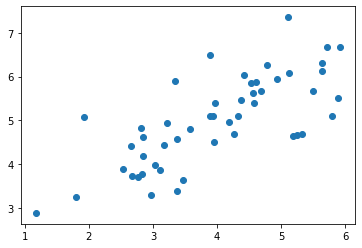

In [2]:
X = loadmat('../data/ex7data1.mat')['X']*1.0
print(X.shape)
print(X.dtype)
plt.scatter(X[:,0],X[:,1])
plt.show()

## 2.2 Implementing PCA
code in utils.py

In [5]:
X_norm = feature_normalize(X)
u,s = pca(X_norm)
u[:,0]

array([-0.70710678, -0.70710678])

## 2.3 Dimensionality Reduction with PCA

### 2.3.1 Projecting the data onto the principal components

In [7]:
K = 1
proj = project_data(X_norm, u, K)
proj[0]

array([1.49631261])

### 2.3.2 Reconstructing an approximation of the data

In [9]:
X_rec = recover_data(proj, u, K)
X_rec[0]

array([-1.05805279, -1.05805279])

### 2.3.3 Visualizing the projections

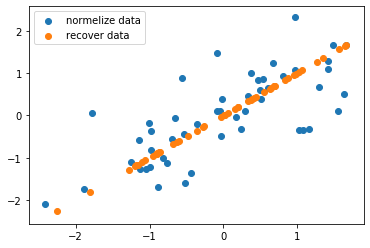

In [10]:
plt.scatter(X_norm[:,0], X_norm[:,1], label = 'normelize data')
plt.scatter(X_rec[:,0], X_rec[:,1], label= 'recover data')
plt.legend()

## 2.4 Face Image Dataset

In [11]:
X = loadmat('../data/ex7faces.mat')['X']
print(X.shape)
print(X.dtype)

(5000, 1024)
float64


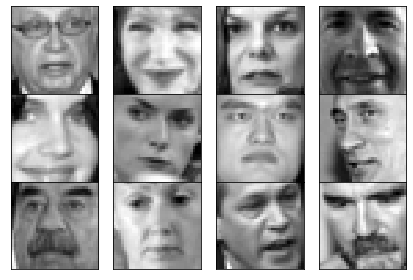

In [12]:
img_idx_V = np.random.randint(0,X.shape[0],12)

for i, img_idx in enumerate(img_idx_V):
    plt.subplot(3,4,i+1,xticks=[], yticks=[])
    plt.imshow(X[img_idx].reshape([32,32]).T, cmap='gray')

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

### 2.4.1 PCA on Faces

In [13]:
X_norm = feature_normalize(X)
u,s = pca(X_norm)

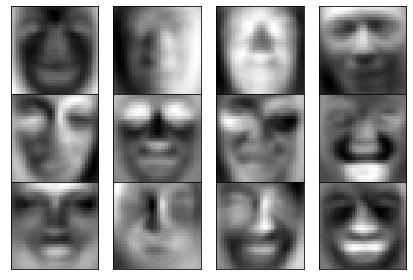

In [14]:
for i in range(12):
    pc = u[:,i]
    plt.subplot(3,4,i+1,xticks=[], yticks=[])
    plt.imshow(pc.reshape([32,32]).T, cmap='gray')
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

### 2.4.2 Dimensionality Reduction

In [15]:
K = 100
proj = project_data(X_norm, u, K)
X_rec = recover_data(proj, u, K)

rate = s[:K].sum()/s.sum()
print('compression rate: %.3f' % rate)

compression rate: 0.932


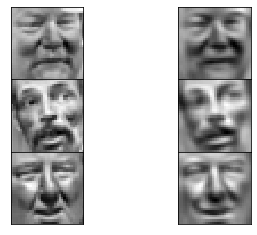

In [16]:
img_idx_V = np.random.randint(0,X.shape[0],3)

# plt.figure(figsize=[4,4])
for i, img_idx in enumerate(img_idx_V):
    plt.subplot(3,2,(i+1)*2-1,xticks=[], yticks=[])
    plt.imshow(X_norm[img_idx].reshape([32,32]).T, cmap='gray')
    plt.subplot(3,2,(i+1)*2,xticks=[], yticks=[])
    plt.imshow(X_rec[img_idx].reshape([32,32]).T, cmap='gray')

# plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)